In [21]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

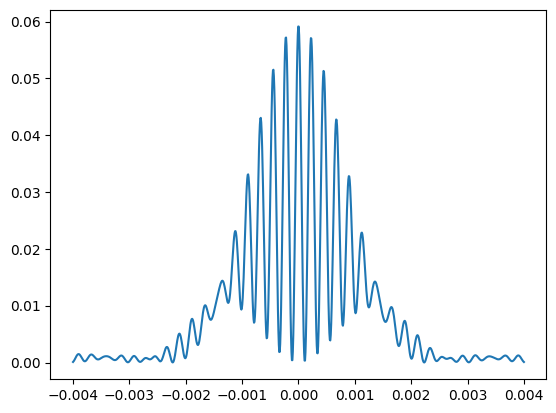

In [46]:
#1
N=100000
D=0.3
lambda_= 670E-9
A= 0.001
a=0.0001
d=0.0009

x=np.random.uniform(-A/2,A/2,N)
y1=np.random.uniform(d/2-a/2,d/2+a/2,N)

lista=[1,-1]
y = y1*np.random.choice(lista,len(y1))
z=np.linspace(-0.004,0.004,1000)
resultado = 0
resultados_f=[]
k=np.pi*1j/lambda_

resultados_f = []
for j in range(1000):
    suma = np.exp(2*k*2*D) * np.exp(k*(x-y)**2/D) * np.exp(k*(z[j]-y)**2/D)
    resultado = np.abs(np.mean(suma))**2
    resultados_f.append(resultado)




plt.plot(z,resultados_f)
    
plt.show


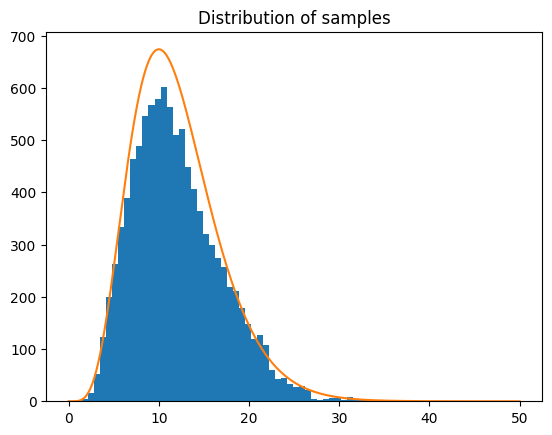

In [40]:
x_0 = 10
x_i = x_0
no_samples = 10000
samples = []
a=6
b=2
fun=lambda x: x**(a-1)*np.exp(-x/b)
ancho=2
for i in range(no_samples):
    u = np.random.rand()
    x_star = np.random.normal(x_i,ancho)
    if u < min(1,fun(x_star)/fun(x_i)):
        x_i = x_star
    samples.append(x_i)
plt.hist(samples,bins=50)
plt.title('Distribution of samples')
x = np.linspace(0, 50, 1000)
plt.plot(x, fun(x), label='Distribución objetivo')
plt.show()

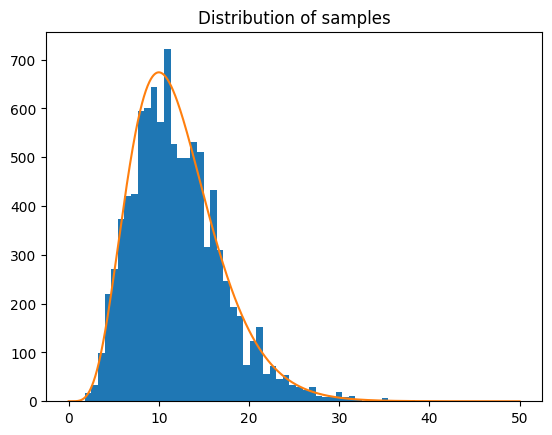

In [43]:
x_0 = 10
x_i = x_0
no_samples = 10000
samples = []
a=6
b=2
fun=lambda x: x**(a-1)*np.exp(-x/b)
ancho=20

for i in range(no_samples):
    u = np.random.rand()
    x_star = np.random.normal(x_i,ancho)
    if u < min(1,fun(x_star)/fun(x_i)):
        x_i = x_star
    samples.append(x_i)
plt.hist(samples,bins=50)
plt.title('Distribution of samples')
x = np.linspace(0, 50, 1000)
plt.plot(x, fun(x), label='Distribución objetivo')
plt.show()

In [45]:
from scipy.stats import gamma
alpha, o, beta= gamma.fit(samples)

alpha, beta

(np.float64(5.426086272776564), np.float64(2.142305154521523))